<h1><center>NUTRITION FROM WEB-SCRAPED RECIPES</center></h1>
<table><tr>
    <td><img src="Img/AllTitle.png"></td>
    <td><img src="Img/AllIng.png"></td>
</tr></table> 
<h2><center>Nema and Naomi</center></h2>

# DATASET AND MOTIVATION
**How**  
This data set was collected from web scraping a selection of online cooking websites and associating their ingredients with nutrition data from the USDA's Nutrient Data Library.

**Why**  
We thought that this project presented a pop-culture focus, demonstrated some proof-of-concept potential in nutritional health and research, and was both challenging and fun.

**Meta Data**
- Scraped Data
    - Utilizing BeautifulSoup and open source recipe scraping code
    - 155,876 recipes in a csv with url, recipe title, total time, and each ingredient as a separate field

- USDA Nutrition Data 
    - Most major food items in the American diet
    - Common nutrition markers and experimental/analytic data

# RESEARCH QUESTIONS  
<br>  
**PROBLEM**: Nutritional information not widely available on recipe websites. This automated process would enable websites to offer that information to consumers and create a better user experience.
<br>  
**INPUT**: Raw web-scraped recipe data.
<br>  
**OUTPUT**: USDA nutritional information.

<table><tr>
    <td><img src="Img/TastyTitle.png"></td>
    <td><img src="Img/TastyIng.png"></td>
</tr></table> 

# DATA CLEANING/TRANSFORMATION

### RECIPE WEB-SCRAPING

 - Webscraping
  - Each site has a different page format
  - Each site has a different url trick to cycle through all recipe pages
  - Deal with timeouts
 - Identification of inappropriate data
  - No ingredients
  - Repeated ingredients
  - Commas within ingredients
  - Duplicated recipes
  - Truncating instructions included within an ingredient

<table><tr>
    <td><img src="Img/FoodNetTitle.png"></td>
    <td><img src="Img/FoodNetIng.png"></td>
</tr></table> 

### USDA Nutrient Parsing

- Parsing quantity and weight information using keywords
    - Differentiating unique unicode characters such as '½' and accounting for every numeric combination to indicate quantity and weight
- Removal of stop words
- Truncation of ingredient to match in USDA name file
    - Which heuristic to use?
        - Highest number of matches?
        - Lowest number of words?
        - **_"The correct item is the one that (1) contains the highest number of matches and (2) has the shortest length if the there is a tie of the highest number of matches."_**

### USDA Nutrient Parsing (Unusual Incidents)  
There were many edge cases that come up in parsing numeric descriptors. Two, six and a half ounce steaks may be written in many ways. For example:
- 2 6 1/2 ounce steaks
- 2, 6½ ounce steaks
- 2 6 ½ oz. steaks  

Making sure you don't end up with 26 steaks or 2 ounces of steak required EDGE CASES GALORE.
<br>  
Often there would be an incorrect match that satisfies the heuristic properties. For example, _"1 clove of garlic"_ may either match with _"garlic, raw"_ or _"clove, spice"_ in the USDA nutrition databse, leading to a possible error.

# DEMONSTRATION

﻿https://www.bonappetit.com/recipe/rack-of-venison-stuffed-with-pecans-currants-sausage-and-pears, "Rack of Venison Stuffed with Pecans, Currants, Sausage, and Pears",0,"5 tablespoons olive oil, divided",1 cup chopped onion,"4 ounces sweet Italian sausages, casings removed",Roasted Bosc Pears,"1/2 cup pecans, toasted",1/3 cup dried currants,1 teaspoon chopped fresh rosemary,1,"1 2 1/2-pound rack of venison, frenched ,",1,"2 medium onions, thinly sliced","2 heads of garlic, cloves separated, root ends trimmed, unpeeled",6 fresh rosemary sprigs,1 bunch fresh thyme,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['sandwich spread', 'with chopped pickle', 'regular', 'unspecified oils']  
best match: [1, 63, '04030', '0400']  
###############  

truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['oil', 'rice bran']  
best match: [1, 14, '04037', '0400']  
###############  

truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['oil', 'coconut']  
best match: [1, 12, '04047', '0400']  
###############  

truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['oil', 'olive', 'salad or cooking']  
best match: [2, 28, '04053', '0400']  
###############  

truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['oil', 'corn', 'peanut', 'and olive']  
best match: [2, 28, '44005', '0400']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['5', 'tablespoons', 'olive', 'oil', 'divided']  
truncated:  ['olive', 'oil', 'divided']  
USDA_Desc:  ['oil', 'corn', 'peanut', 'and olive']  
best match: [2, 28, '44005', '0400']  

qty:   5.0  
grams: 75.0  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['onion']  
USDA_Desc:  ['spices', 'onion powder']  
best match: [1, 20, '02026', '0200']  
###############  

truncated:  ['onion']  
USDA_Desc:  ['onions', 'raw']  
best match: [1, 11, '11282', '1100']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['1', 'cup', 'chopped', 'onion']  
truncated:  ['onion']  
USDA_Desc:  ['onions', 'raw']  
best match: [1, 11, '11282', '1100']  

qty:   1.0  
grams: 250.0  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['milk', 'canned', 'condensed', 'sweetened']  
best match: [1, 34, '01095', '0100']  
###############  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['whey', 'sweet', 'fluid']  
best match: [1, 18, '01114', '0100']  
###############  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['whey', 'sweet', 'dried']  
best match: [1, 18, '01115', '0100']  
###############  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['prego pasta', 'italian sausage and garlic italian sauce', 'ready-to-serve']  
best match: [2, 69, '06226', '0600']  
###############  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['sausage', 'italian', 'pork', 'raw']  
best match: [2, 27, '07036', '0700']  
###############  

truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['sausage', 'italian', 'sweet', 'links']  
best match: [3, 30, '07914', '0700']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['4', 'ounces', 'sweet', 'italian', 'sausages', 'casings', 'removed']  
truncated:  ['sweet', 'italian', 'sausages', 'casings', 'removed']  
USDA_Desc:  ['sausage', 'italian', 'sweet', 'links']  
best match: [3, 30, '07914', '0700']  

qty:   4.0  
grams: 112.0  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['fruit cocktail', '(peach and pineapple and pear and grape and cherry)', 'canned', 'water pack', 'solids and liquids']  
best match: [1, 107, '09096', '0900']  
###############  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['fruit cocktail', '(peach and pineapple and pear and grape and cherry)', 'canned', 'juice pack', 'solids and liquids']  
best match: [1, 107, '09097', '0900']  
###############  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['fruit salad', '(peach and pear and apricot and pineapple and cherry)', 'canned', 'water pack', 'solids and liquids']  
best match: [1, 106, '09102', '0900']  
###############  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['fruit salad', '(peach and pear and apricot and pineapple and cherry)', 'canned', 'juice pack', 'solids and liquids']  
best match: [1, 106, '09103', '0900']  
###############  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['pears', 'raw']  
best match: [1, 10, '09252', '0900']  
###############  

truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['pears', 'raw', 'bosc']  
best match: [2, 16, '09414', '0900']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['roasted', 'bosc', 'pears']  
truncated:  ['roasted', 'bosc', 'pears']  
USDA_Desc:  ['pears', 'raw', 'bosc']  
best match: [2, 16, '09414', '0900']  

qty:   None  
grams: None  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['pecans', 'toasted']  
USDA_Desc:  ['seeds', 'sesame seeds', 'whole', 'roasted and toasted']  
best match: [1, 47, '12024', '1200']   
###############  

truncated:  ['pecans', 'toasted']  
USDA_Desc:  ['nuts', 'pecans']  
best match: [1, 12, '12142', '1200']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['0.5', 'cup', 'pecans', 'toasted']  
truncated:  ['pecans', 'toasted']  
USDA_Desc:  ['nuts', 'pecans']  
best match: [1, 12, '12142', '1200']  

qty:   0.5  
grams: 125.0  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['dried', 'currants']  
USDA_Desc:  ['apples', 'dried', 'sulfured', 'uncooked']  
best match: [1, 33, '09011', '0900']  
###############  

truncated:  ['dried', 'currants']  
USDA_Desc:  ['cherries', 'tart', 'dried', 'sweetened']  
best match: [1, 32, '09044', '0900']  
###############  

truncated:  ['dried', 'currants']  
USDA_Desc:  ['cranberries', 'dried' , 'sweetened']  
best match: [1, 29, '09079', '0900']  
###############  

truncated:  ['dried', 'currants']  
USDA_Desc:  ['currants', 'european black', 'raw']  
best match: [1, 29, '09083', '0900']  
###############  

truncated:  ['dried', 'currants']  
USDA_Desc:  ['currants', 'zante', 'dried']  
best match: [2, 22, '09085', '0900']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['0.3333333333333333', 'cup', 'dried', 'currants']  
truncated:  ['dried', 'currants']  
USDA_Desc:  ['currants', 'zante', 'dried']  
best match: [2, 22, '09085', '0900']  

qty:   0.3333333333333333  
grams: 83.33333333333333  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~  

truncated:  ['fresh', 'rosemary']  
USDA_Desc:  ['basil', 'fresh']  
best match: [1, 12, '02044', '0200']  
###############  

truncated:  ['fresh', 'rosemary']  
USDA_Desc:  ['thyme', 'fresh']  
best match: [1, 12, '02049', '0200']  
###############  

truncated:  ['fresh', 'rosemary']  
USDA_Desc:  ['rosemary', 'fresh']  
best match: [2, 15, '02063', '0200']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['1', 'teaspoon', 'chopped', 'fresh', 'rosemary']  
truncated:  ['fresh', 'rosemary']  
USDA_Desc:  ['rosemary', 'fresh']  
best match: [2, 15, '02063', '0200']  

qty:   1.0  
grams: 5.0  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['butter', 'salted']  
best match: [1, 14, '01001', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['cheese', 'blue']  
best match: [1, 12, '01004', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['cheese', 'brie']  
best match: [1, 12, '01006', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['cheese', 'edam']  
best match: [1, 12, '01018', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['cheese', 'feta']  
best match: [1, 12, '01019', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['eggnog']  
best match: [1, 6, '01057', '0100']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['vanilla extract']  
best match: [2, 15, '02050', '0200']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['lamb', 'new zealand', 'imported', 'rack - partly frenched', 'separable lean and fat', 'raw']  
best match: [3, 80, '17080', '1700']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['lamb', 'new zealand', 'imported', 'rack - partly frenched', 'separable lean only', 'raw']  
best match: [3, 77, '17082', '1700']  
###############  

truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['lamb', 'new zealand', 'imported', 'rack - fully frenched', 'separable lean only', 'raw']  
best match: [3, 76, '17397', '1700']  
###############  

 ~^~^~^~^~^~^~^~^~^~  RESULT  ~^~^~^~^~^~^~^~^~^~^~  
scraped:    ['3.0', '1/2-pound', 'rack', 'of', 'venison', 'frenched', '']  
truncated:  ['rack', 'venison', 'frenched', '']  
USDA_Desc:  ['lamb', 'new zealand', 'imported', 'rack - fully frenched', 'separable lean only', 'raw']  
best match: [3, 76, '17397', '1700']  

qty:   3.0  
grams: 1360.7759999999998  
 ~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~^~ 

In [13]:
demo_df = pd.read_pickle("demo.pickle")
demo_df

,Recipe,Link,Time (min),Ingredient,Calories (kcal),Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrate (g),Dietary Fiber (g),Sugars (g),Protein (g),Vitamin A (IU),Vitamin C (mg),Calcium (mg),Iron (mg)
0,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"5 tablespoons olive oil, divided",663.000000,75.000000,10.7752,None,0,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.097500
1,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,1 cup chopped onion,100.000000,0.250000,0.105,0,0,10.000000,23.350000,4.250000,10.6,2.750000,5.000000,18.500000,57.500000,0.525000
2,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"4 ounces sweet Italian sausages, casings removed",166.880000,9.430400,3.64784,None,33.6,638.400000,2.352000,0.000000,0,18.065600,2.240000,0.224000,28.000000,1.332800
3,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,Roasted Bosc Pears,167.500000,0.225000,None,0,None,2.500000,40.250000,7.750000,25.575,0.900000,47.500000,7.000000,25.000000,0.375000
4,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"1/2 cup pecans, toasted",863.750000,89.962500,7.725,None,0,0.000000,17.325000,12.000000,4.9625,11.462500,70.000000,1.375000,87.500000,3.162500
5,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,1/3 cup dried currants,235.833333,0.225000,0.0233333,None,0,6.666667,61.733333,5.666667,56.0667,3.400000,60.833333,3.916667,71.666667,2.716667
6,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,1 teaspoon chopped fresh rosemary,6.550000,0.293000,0.1419,0,0,1.300000,1.035000,0.705000,None,0.165500,146.200000,1.090000,15.850000,0.332500
7,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"1 2 1/2-pound rack of venison, frenched",2000.340720,96.887251,41.422,4.74911,843.681,857.288880,0.000000,0.000000,0,280.455934,231.331920,0.000000,108.862080,19.050864
8,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"2 medium onions, thinly sliced",200.000000,0.500000,0.21,0,0,20.000000,46.700000,8.500000,21.2,5.500000,10.000000,37.000000,115.000000,1.050000
9,"Rack of Venison Stuffed with Pecans, Currants,...",﻿https://www.bonappetit.com/recipe/rack-of-ven...,0,"2 heads of garlic, cloves separated, root ends...",82.200000,3.900000,1.1856,0.0762,0,83.100000,19.659000,10.170000,0.714,1.791000,48.000000,0.060000,189.600000,3.549000


# STATISTICS

In [1]:
# WEB-SCRAPED RECIPES
import warnings
warnings.filterwarnings(action='ignore')
from NG_analysis import *

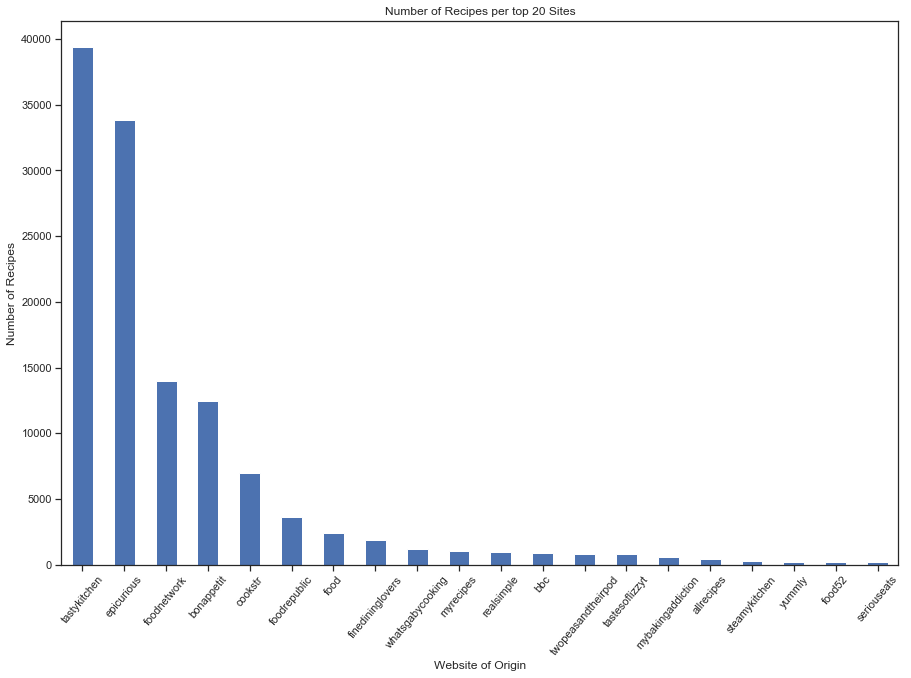

In [2]:
plt.figure(figsize=(15,10))
wb_topsum.NumRecipes.sort_values(ascending=False).plot.bar()

plt.xticks(rotation=50)
plt.title('Number of Recipes per top 20 Sites')
plt.xlabel("Website of Origin")
plt.ylabel("Number of Recipes")
plt.show()

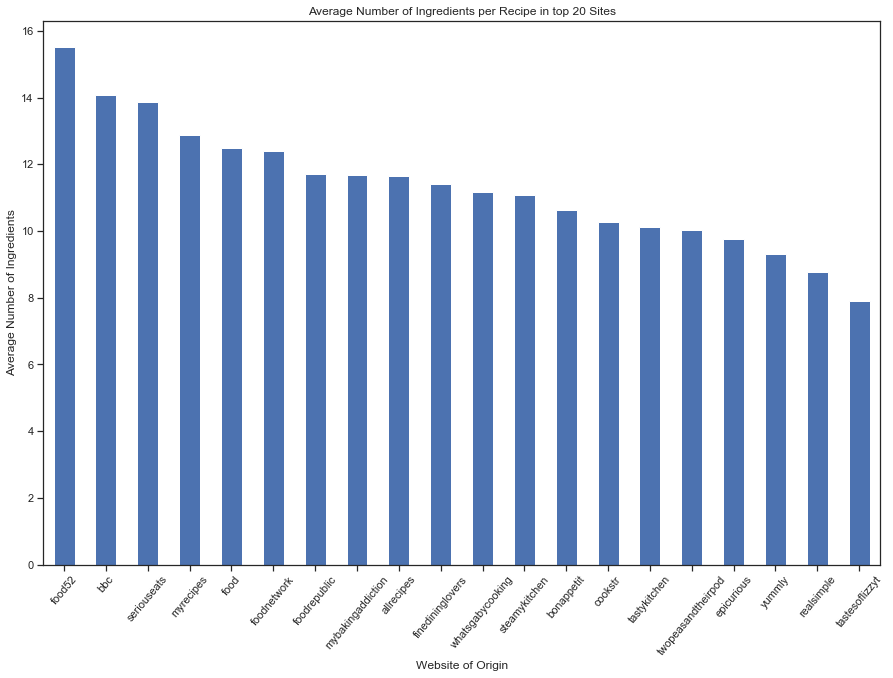

In [3]:
plt.figure(figsize=(15,10))
wb_topsum.AveNumIngr.sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Average Number of Ingredients per Recipe in top 20 Sites')
plt.xlabel("Website of Origin")
plt.ylabel("Average Number of Ingredients")
plt.show()

In [4]:
# USDA NUTRITION BY RECIPE

# Analysis tools imported from python script in repository
# ! curl -O https://raw.githubusercontent.com/nemasobhani/Nutrition-from-Web-Scraped-Recipes/master/NS_analysis.py
# ! curl -O https://raw.githubusercontent.com/nemasobhani/Nutrition-from-Web-Scraped-Recipes/master/get_nutrition_FULL100k.txt
    
from NS_analysis import *

# Stats by Recipe
RecipeAnalyze(analysis=True)

,Mean,Median,Max,Max Recipe
Nutrition,,,,
Calories (kcal),4681.8,3730.0,19546.2,Chocolate Oreo Whoopie Pies
Total Fat (g),223.7,163.4,1065.6,Banana Bars
Saturated Fat (g),85.1,53.6,461.5,Bubble and Squeak with Sausages and Onion Gravy
Trans Fat (g),2.4,0.6,17.2,Caramel Corn Pretzel Cookies
Cholesterol (mg),1356.9,406.4,9696.2,New England-Style Clam Chowder
Sodium (mg),7059.3,5220.0,41314.0,Cold Minted Pea and Buttermilk Soup
Total Carbohydrate (g),486.5,363.7,2215.4,Coconut Shrimp
Dietary Fiber (g),52.7,38.4,252.5,Chocolate Bread Pudding
Sugars (g),163.1,84.3,960.4,Lime Angel Food Cake with Lime Glaze and Pista...


In [5]:
# Stats by Ingredient
IngredientAnalyze(analysis=True)

,Mean,Median,Max,Max Ingredient
Nutrition,,,,
Calories (kcal),353.077330,159.30000,2220.0000,"3 dried Chinese mushrooms, soaked in warm wate..."
Total Fat (g),11.823488,1.62500,94.5200,A dab of butter
Saturated Fat (g),3.182527,0.28500,30.5625,2 1/2 tablespoons vegetable oil
Trans Fat (g),0.199130,0.12920,0.6460,5 medium free-range eggs
Cholesterol (mg),57.198258,49.84000,172.5000,250g/8¾oz fresh young goats' cheese
Sodium (mg),285.525522,30.00000,2612.0000,"400g/14oz strong cheddar, grated"
Total Carbohydrate (g),30.308622,10.68750,205.2500,"1 ciabatta loaf, cut into two horizontally the..."
Dietary Fiber (g),4.689192,2.97000,21.2500,"5-6 juniper berries, crushed in pestle and mortar"
Sugars (g),8.215546,2.26796,62.7648,3 ounces molasses


In [6]:
# Fun Facts
Factoids()

Here are some fun facts about our processed data!

Pounds of butter: 9,521 

Feet of sausage: 2668 

All of our scraped recipes would feed 252,043 people for 1 day (based on 2,000 Cal diet).
For one individual, that would take 691 years to eat!

Our recipes contain a 253 year supply of protein for a bodybuilder!

Enough garlic to kill 26,381 vampires.



# VISUALIZATION

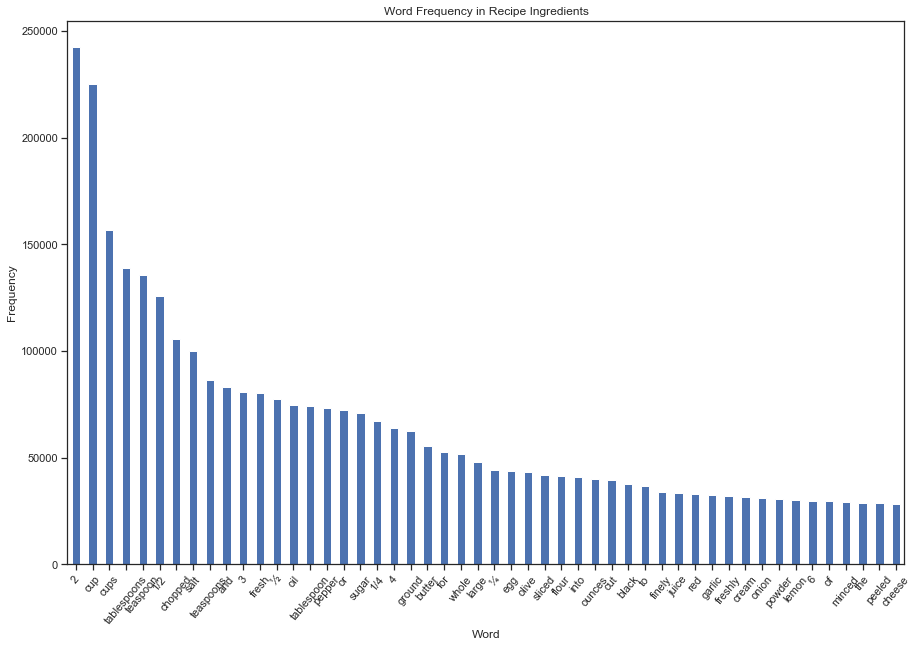

In [7]:

plt.figure(figsize=(15,10))
wordfreq_Ing.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency in Recipe Ingredients')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

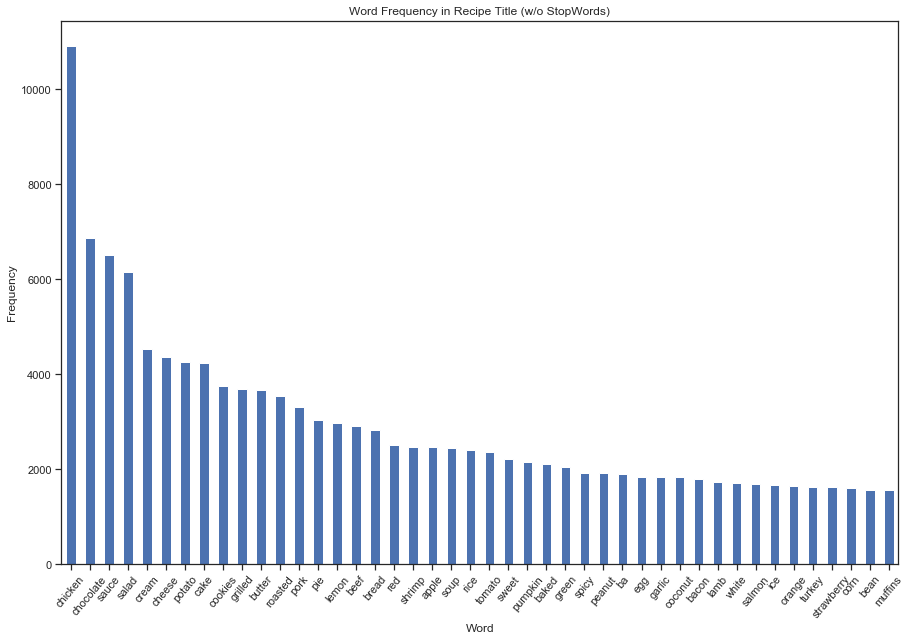

In [8]:
plt.figure(figsize=(15,10))
wordfreq_Title_wo_stop.head(50).sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title('Word Frequency in Recipe Title (w/o StopWords)')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'Plotting complete!'

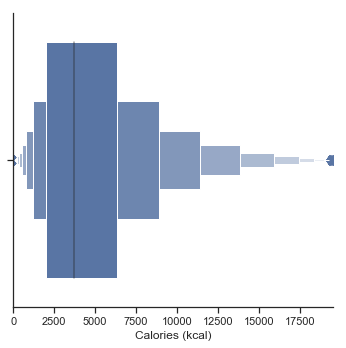

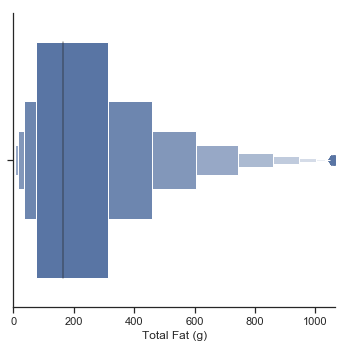

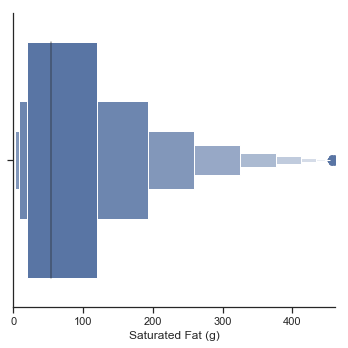

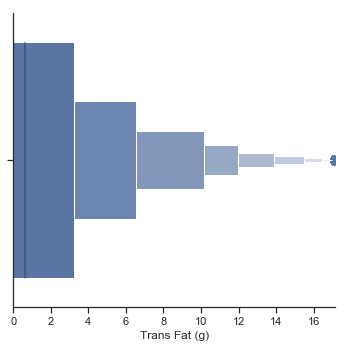

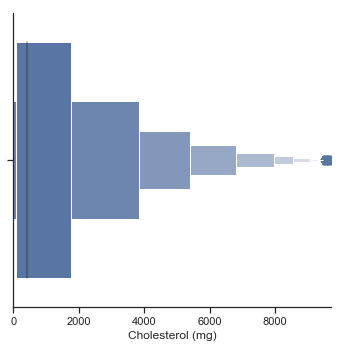

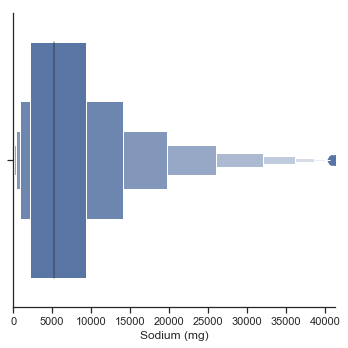

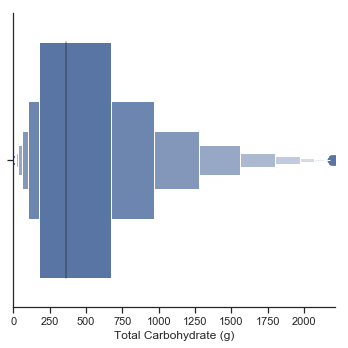

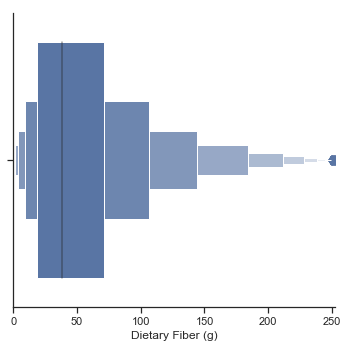

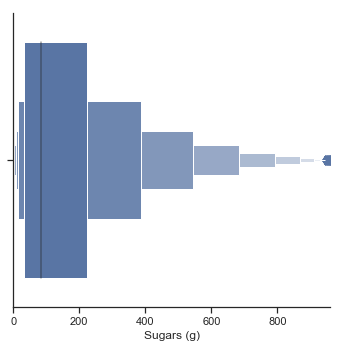

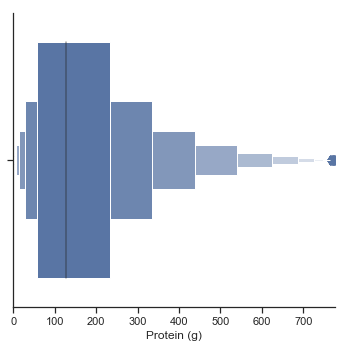

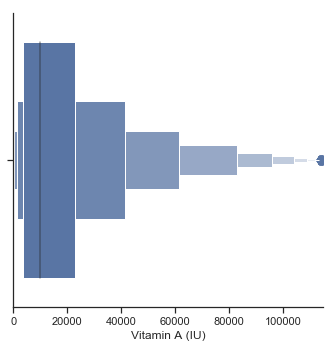

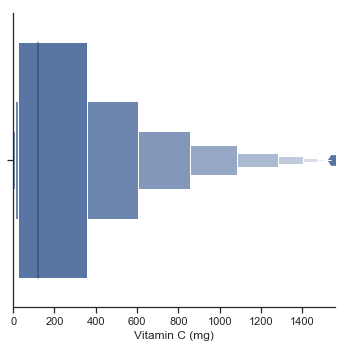

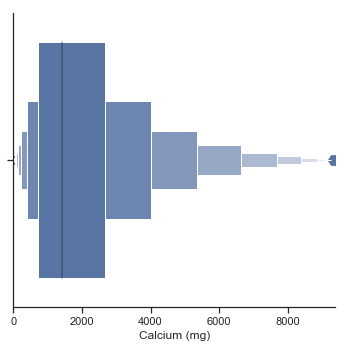

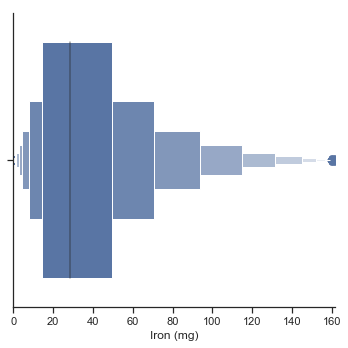

In [9]:
# Nutrient Visualization by Recipe
RecipeAnalyze(plot=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'Plotting complete!'

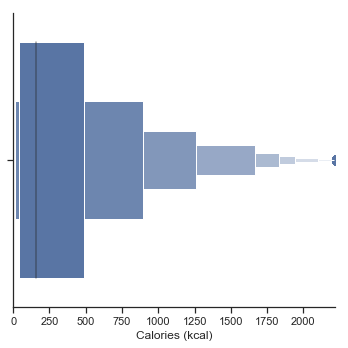

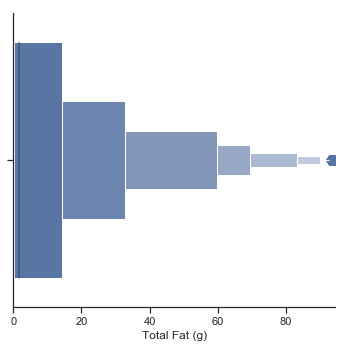

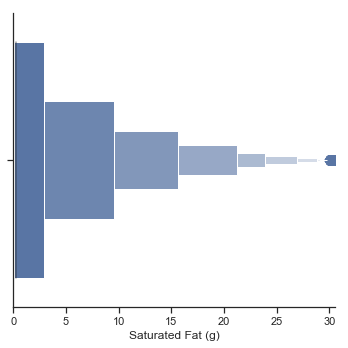

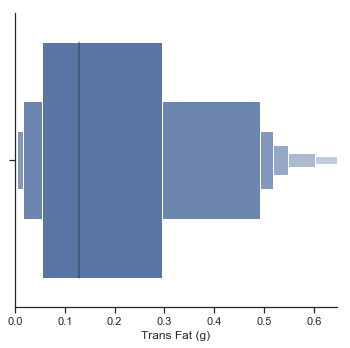

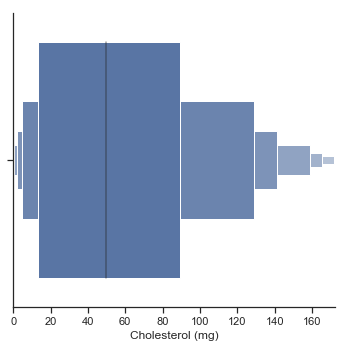

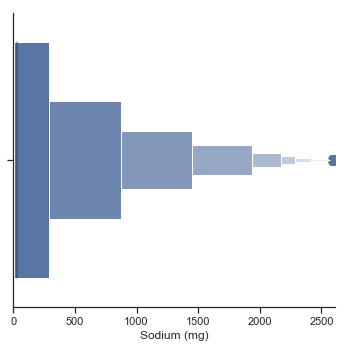

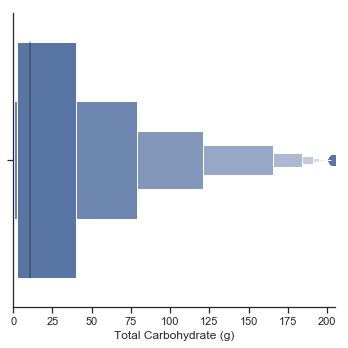

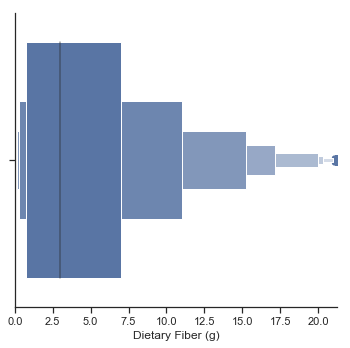

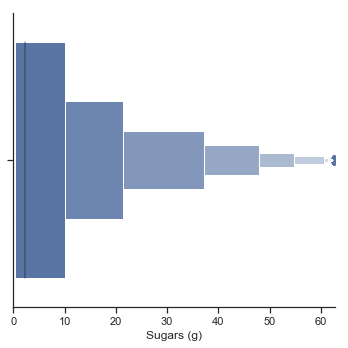

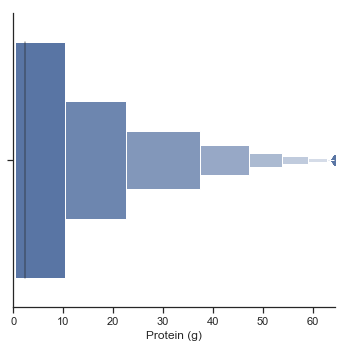

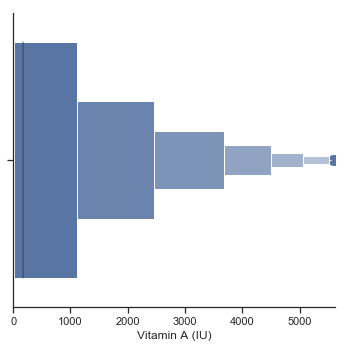

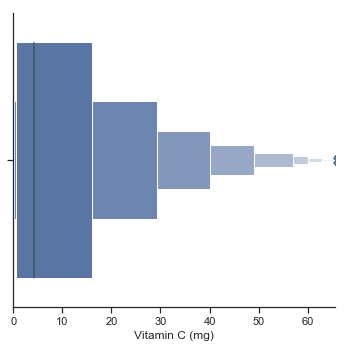

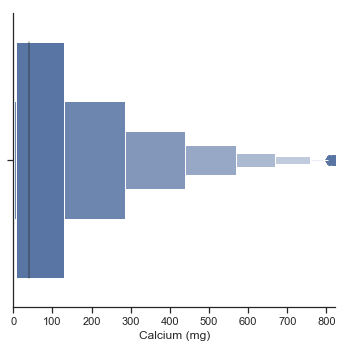

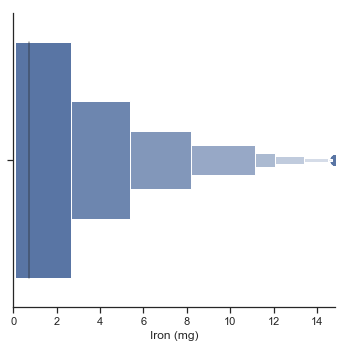

In [10]:
# Nutrient Visualization by Ingredient
IngredientAnalyze(plot=True)